# Extreme value analysis on ERA5 data

In this notebook we demonstrate calculations of extreme value analysis for ERA5 variables. Similar analysis would be possible to other similar gridded reanalysis data sets. As ERA5 is quite a low resolution (0.25°) data set, extremes are bound to be smoothened. For more refined analysis, a higher resolution data could be used. For example ERA5 Land has 0.1° spatial resolution.

In [1]:
import numpy as np
import xarray as xr

import matplotlib.pyplot as plt

In [2]:
era5 = xr.open_dataset('~/DATA/RISKADAPT/ERA5_Europe_monthly_max.nc')
era5

<xarray.Dataset>
Dimensions:    (time: 492, latitude: 187, longitude: 261)
Coordinates:
  * latitude   (latitude) float64 72.0 71.75 71.5 71.25 ... 26.0 25.75 25.5
  * longitude  (longitude) float64 -25.0 -24.75 -24.5 -24.25 ... 39.5 39.75 40.0
  * time       (time) datetime64[ns] 1979-01-31 1979-02-28 ... 2019-12-31
Data variables:
    t2m        (time, latitude, longitude) float32 ...
    d2m        (time, latitude, longitude) float32 ...
    ws10       (time, latitude, longitude) float32 ...
    tp24       (time, latitude, longitude) float32 ...

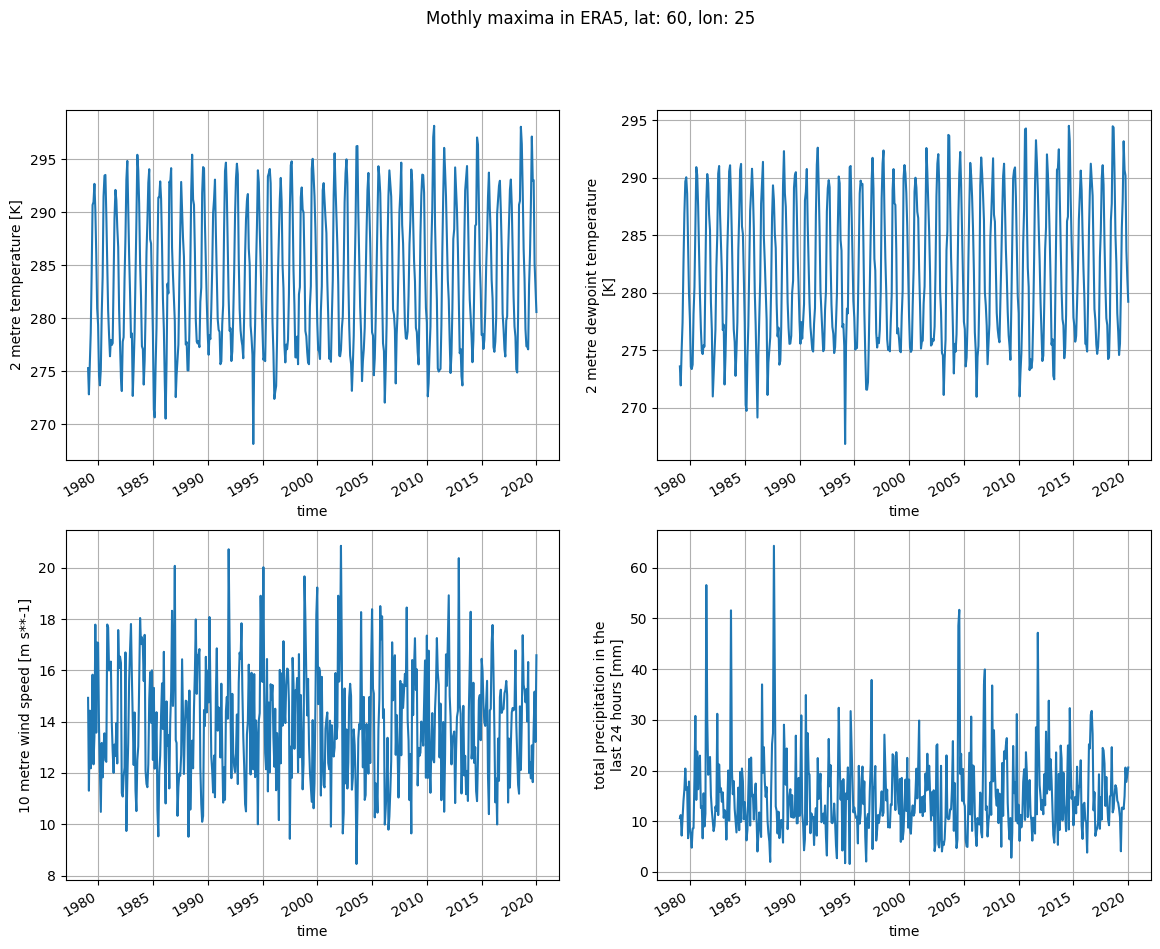

In [3]:
lon, lat = 25, 60

fig, axs = plt.subplots(2, 2, figsize=(14, 10))
era5['t2m'].interp(latitude=lat, longitude=lon).plot(ax=axs[0,0])
era5['d2m'].interp(latitude=lat, longitude=lon).plot(ax=axs[0,1])
era5['ws10'].interp(latitude=lat, longitude=lon).plot(ax=axs[1,0])
era5['tp24'].interp(latitude=lat, longitude=lon).plot(ax=axs[1,1])
for ax in axs.ravel():
    ax.grid()
    ax.set_title('')
plt.suptitle(f'Mothly maxima in ERA5, lat: {lat}, lon: {lon}')
plt.show()

## GEV analysis

We provide a set of Python functions that can be used to fit a generalized extreme value distribution to a time series data and calculate return levels for given return periods. It uses Stan probabilistic language to define the statistical model and calculate posterior probabilities for GEV parameters as well as for quantiles of the fitted distribution, which in turn van be used to calculate return levels and their uncertainties. The estimation is based on Markov chain Monte Carlo (MCMC) sampling.

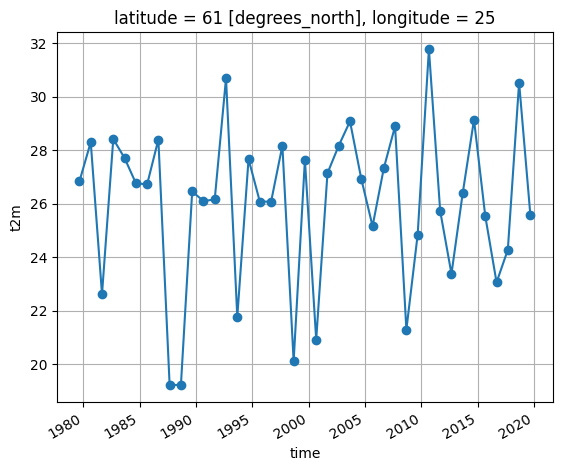

In [4]:
import cmdstan_gev as stangev

# select one location
lat = 61
lon = 25
month = 8

months = era5['time.month']
y = era5['t2m'].where(months==month, drop=True).interp(latitude=lat, longitude=lon) - 273.15

y.plot(marker='o')
plt.grid()
plt.show()

In [6]:
fit = stangev.gev_fit(y.values)

16:00:52 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

16:00:52 - cmdstanpy - INFO - CmdStan done processing.
16:00:52 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 300 divergent transitions (30.0%)
	Chain 2 had 264 divergent transitions (26.4%)
	Chain 3 had 249 divergent transitions (24.9%)
	Chain 4 had 213 divergent transitions (21.3%)
	Use function "diagnose()" to see further information.


Plot chain histograms of estimated GEV parameters.

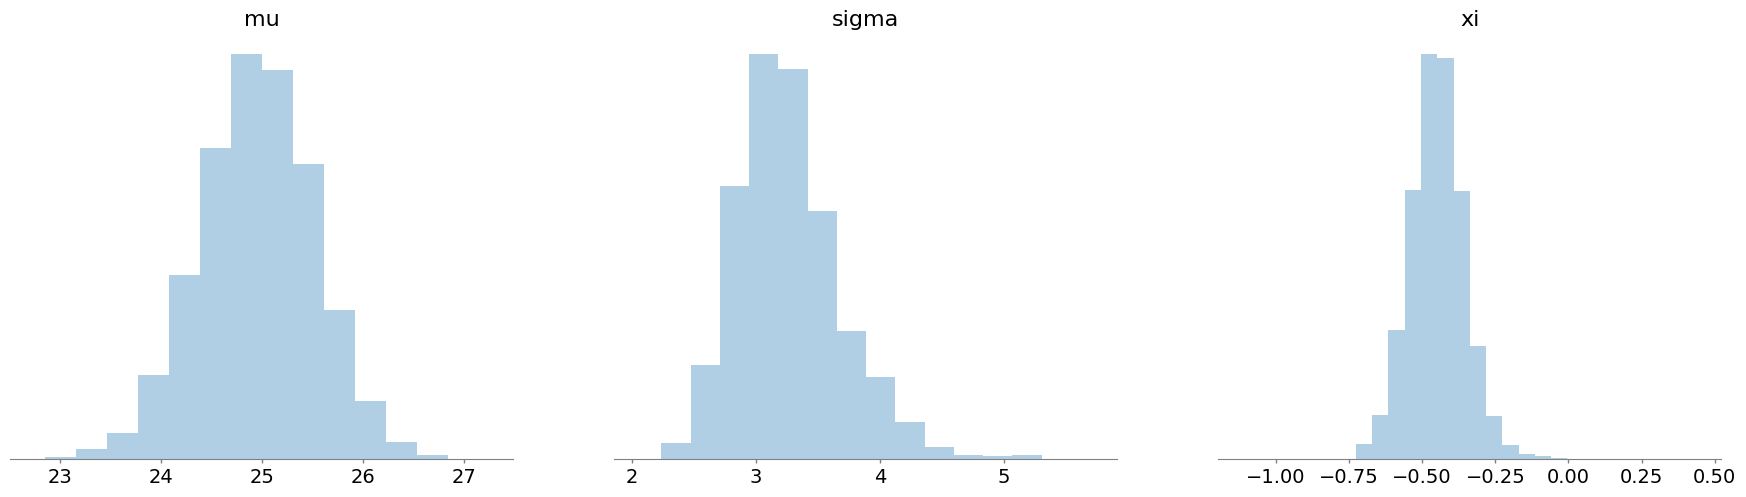

In [7]:
stangev.gev_posterior(fit)
plt.show()

Return level plot with return periods in logarithmic scale in the x axis. The blue shaded area gives 95% predictive uncertainty envelope for the return levels.

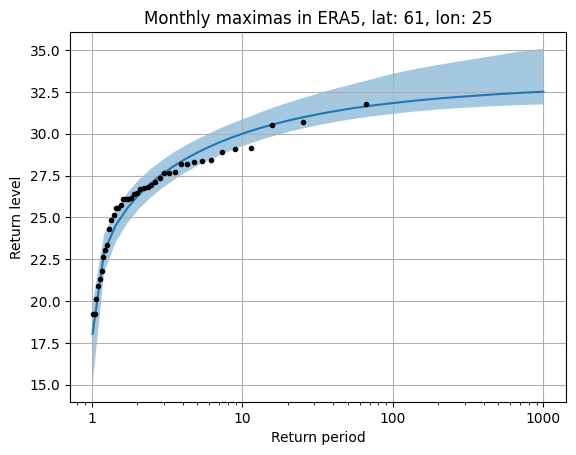

In [8]:
stangev.gev_qplot(y.values, fit, maxp=1000)
plt.title(f'Monthly maximas in ERA5, lat: {lat}, lon: {lon}')
plt.show()